# Image Classification, CNN

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.datasets import mnist
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

/home/marianne/anaconda/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit,cross_val_score
from sklearn.svm import LinearSVC

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as sio
from os import walk

# Multilayer perceptron - MNIST

Classification using a multilayer perceptron for digit recognition

In [32]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [33]:
num_classes = 10
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

#### Vanilla models

In [34]:
def make_model(optimizer="adam", hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_shape=(784,)),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
    ])
    model.compile(optimizer=optimizer,loss="categorical_crossentropy",   
                  metrics=['accuracy'])
    return model

In [35]:
hidden_sizes = [32,64,128,256]

In [36]:
models = []
scores = []
histories = []
for size in hidden_sizes:
    model = make_model(hidden_size = size)
    X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size = 10000)
    history = model.fit(X_train1, y_train1, batch_size=128, epochs=10, verbose=1, validation_data=(X_val, y_val))
    best_score = history.history["val_acc"][-1]
    models.append(model)
    scores.append(best_score)
    histories.append(history)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 1s 26us/step - loss: 0.5612 - acc: 0.8483 - val_loss: 0.2904 - val_acc: 0.9208
Epoch 2/10
50000/50000 [==============================] - 1s 18us/step - loss: 0.2643 - acc: 0.9241 - val_loss: 0.2307 - val_acc: 0.9387
Epoch 3/10
50000/50000 [==============================] - 1s 17us/step - loss: 0.2164 - acc: 0.9384 - val_loss: 0.1997 - val_acc: 0.9471
Epoch 4/10
50000/50000 [==============================] - 1s 17us/step - loss: 0.1850 - acc: 0.9470 - val_loss: 0.1842 - val_acc: 0.9493
Epoch 5/10
50000/50000 [==============================] - 1s 18us/step - loss: 0.1633 - acc: 0.9530 - val_loss: 0.1686 - val_acc: 0.9527
Epoch 6/10
50000/50000 [==============================] - 1s 17us/step - loss: 0.1481 - acc: 0.9573 - val_loss: 0.1588 - val_acc: 0.9548
Epoch 7/10
50000/50000 [==============================] - 1s 18us/step - loss: 0.1359 - acc: 0.9604 - val_loss: 0.1478 - val_acc

In [37]:
print("Validation Accuracy of the Best Model: {:.3f}".format(max(scores)))

Validation Accuracy of the Best Model: 0.976


Text(0,0.5,'loss')

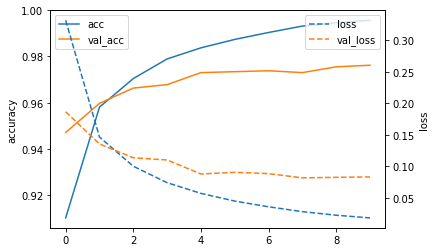

In [38]:
df = pd.DataFrame(histories[np.argmax(scores)].history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

#### Dropout models

In [39]:
def make_model_dropout(optimizer="adam", hidden_size=32):
    model_dropout = Sequential([
        Dense(1024, input_shape=(784,), activation='relu'),
        Dropout(.5),
        Dense(1024, activation='relu'),
        Dropout(.5),
        Dense(10, activation='softmax'),
    ])
    model_dropout.compile(optimizer=optimizer,loss="categorical_crossentropy",   
                  metrics=['accuracy'])
    return model

In [40]:
models_dropout = []
scores_dropout = []
histories_dropout = []
for size in hidden_sizes:
    model = make_model_dropout(hidden_size = size)
    X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size = 10000)
    history = model.fit(X_train1, y_train1, batch_size=128, epochs=10, verbose=1, validation_data=(X_val, y_val))
    best_score = history.history["val_acc"][-1]
    models_dropout.append(model)
    scores_dropout.append(best_score)
    histories_dropout.append(history)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 40us/step - loss: 0.0316 - acc: 0.9908 - val_loss: 0.0376 - val_acc: 0.9877
Epoch 2/10
50000/50000 [==============================] - 2s 34us/step - loss: 0.0203 - acc: 0.9944 - val_loss: 0.0290 - val_acc: 0.9912
Epoch 3/10
50000/50000 [==============================] - 2s 37us/step - loss: 0.0130 - acc: 0.9969 - val_loss: 0.0283 - val_acc: 0.9920
Epoch 4/10
50000/50000 [==============================] - 2s 39us/step - loss: 0.0097 - acc: 0.9981 - val_loss: 0.0282 - val_acc: 0.9917
Epoch 5/10
50000/50000 [==============================] - 2s 39us/step - loss: 0.0079 - acc: 0.9985 - val_loss: 0.0294 - val_acc: 0.9912
Epoch 6/10
50000/50000 [==============================] - 2s 40us/step - loss: 0.0068 - acc: 0.9989 - val_loss: 0.0343 - val_acc: 0.9894
Epoch 7/10
50000/50000 [==============================] - 2s 38us/step - loss: 0.0056 - acc: 0.9990 - val_loss: 0.0287 - val_acc

In [41]:
print("Validation Accuracy of the Best Model: {:.3f}".format(max(scores_dropout)))

Validation Accuracy of the Best Model: 0.999


Text(0,0.5,'loss')

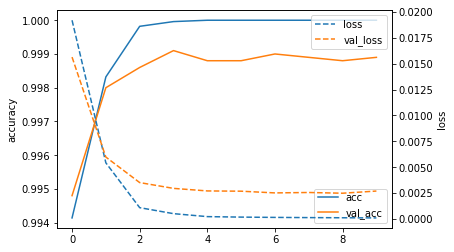

In [42]:
df = pd.DataFrame(histories_dropout[np.argmax(scores_dropout)].history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [43]:
total_scores = [scores, scores_dropout]
total_models = [models, models_dropout]

In [44]:
best_version = np.argmax([max(scores), max(scores_dropout)])
best_model = total_models[best_version][np.argmax(total_scores[best_version])]

In [45]:
test_score = best_model.evaluate(X_test,y_test)
print("Test loss: {:.3f}".format(test_score[0]))
print("Test Accuracy: {:.3f}".format(test_score[1]))

10000/10000 [==============================] - 0s 41us/step
Test loss: 0.093
Test Accuracy: 0.981


# Convolutional Neural Networks - SVHN dataset

CNNs trained on SVHN - single digit classification

In [5]:
train_data = sio.loadmat('train_32x32.mat')
test_data = sio.loadmat('test_32x32.mat')

In [6]:
X_train, y_train = train_data["X"], train_data["y"]
X_test, y_test = test_data["X"], test_data["y"]

In [7]:
y_train = y_train.ravel()
y_train[np.where(y_train==10)] = 0

In [8]:
y_test = y_test.ravel()
y_test[np.where(y_test==10)] = 0

In [9]:
num_classes = 10
# input image dimensions
img_rows, img_cols = 32, 32

X_train_images = np.array([X_train[:,:,:,i] for i in range(X_train.shape[3])])
X_test_images = np.array([X_test[:,:,:,i] for i in range(X_test.shape[3])])
input_shape = (img_rows, img_cols, 3)
y_train = to_categorical(y_train.ravel(), num_classes)
y_test = to_categorical(y_test.ravel(), num_classes)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


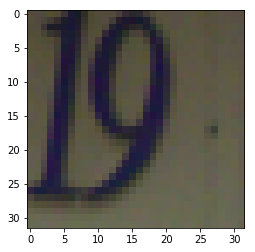

In [10]:
print(y_train[1])
plt.imshow(X_train_images[1])

In [22]:
def cnn_create():
    cnn = Sequential()
    cnn.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    cnn.add(Conv2D(32, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.25))
 
    cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.25))
 
    cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.25))
 
    cnn.add(Flatten())
    cnn.add(Dense(512, activation='relu'))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(10, activation='softmax'))
    
    cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
     
    return cnn

Fit model

In [24]:
model = cnn_create()
batch_size = 256
epochs = 25

history = model.fit(X_train_images, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)

Train on 65931 samples, validate on 7326 samples
Epoch 1/25
65931/65931 [==============================] - 206s 3ms/step - loss: 2.0401 - acc: 0.3667 - val_loss: 0.8005 - val_acc: 0.7573
Epoch 2/25
65931/65931 [==============================] - 204s 3ms/step - loss: 0.8150 - acc: 0.7516 - val_loss: 0.5752 - val_acc: 0.8440
Epoch 3/25
65931/65931 [==============================] - 210s 3ms/step - loss: 0.5882 - acc: 0.8250 - val_loss: 0.3800 - val_acc: 0.8924
Epoch 4/25
65931/65931 [==============================] - 208s 3ms/step - loss: 0.5032 - acc: 0.8509 - val_loss: 0.3389 - val_acc: 0.8965
Epoch 5/25
65931/65931 [==============================] - 208s 3ms/step - loss: 0.4488 - acc: 0.8684 - val_loss: 0.3256 - val_acc: 0.9034
Epoch 6/25
65931/65931 [==============================] - 207s 3ms/step - loss: 0.4147 - acc: 0.8785 - val_loss: 0.2892 - val_acc: 0.9165
Epoch 7/25
65931/65931 [==============================] - 208s 3ms/step - loss: 0.3883 - acc: 0.8871 - val_loss: 0.3534 - v

In [25]:
best_score = history.history["val_acc"][-1]
print("validation score: {}".format( best_score))

validation score: 0.92874692820995


### Using Batch Normalization

In [27]:
def cnn_batch_create():
    cnn = Sequential()
    cnn.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(32, (3, 3), activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.25))
 
    cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.25))
 
    cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.25))
 
    cnn.add(Flatten())
    cnn.add(Dense(512, activation='relu'))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(10, activation='softmax'))
    
    cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
     
    return cnn

In [28]:
model_batch = cnn_batch_create()
batch_size = 256
epochs = 25

history = model_batch.fit(X_train_images, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)

Train on 65931 samples, validate on 7326 samples
Epoch 1/25
65931/65931 [==============================] - 439s 7ms/step - loss: 1.0772 - acc: 0.6559 - val_loss: 0.4983 - val_acc: 0.8444
Epoch 2/25
65931/65931 [==============================] - 428s 6ms/step - loss: 0.4468 - acc: 0.8653 - val_loss: 0.3585 - val_acc: 0.8913
Epoch 3/25
65931/65931 [==============================] - 430s 7ms/step - loss: 0.3658 - acc: 0.8918 - val_loss: 0.3289 - val_acc: 0.9016
Epoch 4/25
65931/65931 [==============================] - 437s 7ms/step - loss: 0.3286 - acc: 0.9018 - val_loss: 0.2874 - val_acc: 0.9170
Epoch 5/25
65931/65931 [==============================] - 437s 7ms/step - loss: 0.2963 - acc: 0.9130 - val_loss: 0.4188 - val_acc: 0.8739
Epoch 6/25
65931/65931 [==============================] - 439s 7ms/step - loss: 0.2764 - acc: 0.9198 - val_loss: 0.3710 - val_acc: 0.8875
Epoch 7/25
65931/65931 [==============================] - 459s 7ms/step - loss: 0.2585 - acc: 0.9243 - val_loss: 0.2416 - v

In [29]:
best_score = history.history["val_acc"][-1]
print("validation score: {}".format( best_score))

validation score: 0.9440349445231065


The batch normalization increased the validation score. Let us test the model with the batch normalization

In [31]:
score = model_batch.evaluate(X_test_images, y_test)
print("test loss: {}".format( score[0]))
print("test accuracy: {}".format( score[1]))

26032/26032 [==============================] - 61s 2ms/step
test loss: 0.2175682827311705
test accuracy: 0.9455669944683467


With this model, we achieve a test-set accuracy of **0.946**

# Using weights of a pre-trained CNN

#### Extract features 

We extracted the weights from the VGG16 neural network to build our features.

In [45]:
pretrained_model = VGG16(include_top=True, weights='imagenet')

In [46]:
pet_name = []
for (dirpath, dirnames, filenames) in walk("images"):
    pet_name.extend(filenames)
    break
pet_name=[i.split(".")[0] for i in pet_name]

In [47]:
d={}

In [ ]:
for name in pet_name:
    img = image.load_img("images/"+name+".jpg", target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = pretrained_model.predict(x)
    d[name]=features[0]

In [ ]:
df_pet=pd.DataFrame.from_dict(d, orient='index')

In [ ]:
pd.DataFrame.to_csv(df_pet,"pet_features")

#### Linear model

We chose to run a Linear SVC on our features.

In [4]:
X=pd.DataFrame.from_csv("pet_features")
y_train=pd.read_csv('annotations/trainval.txt', sep=" ", header=None,index_col=0,usecols=[0,1])
y_train=y_train.rename({1:"label"},axis=1)
total_train=y_train.join(X).dropna()

y_test=pd.read_csv('annotations/test.txt', sep=" ", header=None,index_col=0,usecols=[0,1])
y_test=y_test.rename({1:"label"},axis=1)
total_test=y_test.join(X).dropna()

/home/marianne/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


Tuning LinearSVC

In [5]:
C_param = np.logspace(-2, 1, 5)
param_grid = {'C': C_param}

In [6]:
grid = GridSearchCV(LinearSVC(dual=False), param_grid,cv=5)
grid.fit(total_train.drop("label",axis=1),total_train.label)
LinearSVC_ = grid.best_estimator_
print("Best parameters for LinearSVC {} with associated validation score {}".format(grid.best_params_,grid.best_score_))

Best parameters for LinearSVC {'C': 10.0} with associated validation score 0.7366847826086956


Test score

In [7]:
LinearSVC_.fit(total_train.drop("label",axis=1),total_train.label)
print("train score: {} , test score : {}".format(LinearSVC_.score(total_train.drop("label",axis=1),total_train.label),
                                                 LinearSVC_.score(total_test.drop("label",axis=1),total_test.label)))

train score: 0.8217391304347826 , test score : 0.7606977378032161
